# applly Lemmatizing
(its in the last column )

In [425]:
wn= nltk.WordNetLemmatizer()

def lammatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text ]
    return text 
df_script_jf['headline_lemmatized'] = df_script_jf['headline_nostop'].apply(lambda x: lammatizing(x))
df_script_jf

,link,headline,category,short_description,authors,date,headline_tokenize,short_description_tokenize,headline_nostop,short_description_nostop,headline_lemmatized
0,https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9,Over 4 Million Americans Roll Up Sleeves For OmicronTargeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 millio...,"Carla K. Johnson, AP",2022-09-23,"[over, 4, million, americans, roll, up, sleeves, for, omicrontargeted, covid, boosters]","[health, experts, said, it, is, too, early, to, predict, whether, demand, would, match, up, with...","[4, million, americans, roll, sleeves, omicrontargeted, covid, boosters]","[health, experts, said, early, predict, whether, demand, would, match, 171, million, doses, new,...","[4, million, american, roll, sleeve, omicrontargeted, covid, booster]"
1,https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice...,American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video,U.S. NEWS,He was subdued by passengers and crew when he fled to the back of the aircraft after the confron...,Mary Papenfuss,2022-09-23,"[american, airlines, flyer, charged, banned, for, life, after, punching, flight, attendant, on, ...","[he, was, subdued, by, passengers, and, crew, when, he, fled, to, the, back, of, the, aircraft, ...","[american, airlines, flyer, charged, banned, life, punching, flight, attendant, video]","[subdued, passengers, crew, fled, back, aircraft, confrontation, according, us, attorneys, offic...","[american, airline, flyer, charged, banned, life, punching, flight, attendant, video]"
2,https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02,23 Of The Funniest Tweets About Cats And Dogs This Week Sept 1723,COMEDY,Until you have a dog you dont understand what could be eaten,Elyse Wanshel,2022-09-23,"[23, of, the, funniest, tweets, about, cats, and, dogs, this, week, sept, 1723]","[until, you, have, a, dog, you, dont, understand, what, could, be, eaten]","[23, funniest, tweets, cats, dogs, week, sept, 1723]","[dog, dont, understand, could, eaten]","[23, funniest, tweet, cat, dog, week, sept, 1723]"
3,https://www.huffpost.com/entry/funniest-parenting-tweets_l_632d7d15e4b0d12b5403e479,The Funniest Tweets From Parents This Week Sept 1723,PARENTING,Accidentally put grownup toothpaste on my toddler’s toothbrush and he screamed like I was cleani...,Caroline Bologna,2022-09-23,"[the, funniest, tweets, from, parents, this, week, sept, 1723]","[accidentally, put, grownup, toothpaste, on, my, toddler, s, toothbrush, and, he, screamed, like...","[funniest, tweets, parents, week, sept, 1723]","[accidentally, put, grownup, toothpaste, toddler, toothbrush, screamed, like, cleaning, teeth, c...","[funniest, tweet, parent, week, sept, 1723]"
4,https://www.huffpost.com/entry/amy-cooper-loses-discrimination-lawsuit-franklin-templeton_n_632c...,Woman Who Called Cops On Black BirdWatcher Loses Lawsuit Against ExEmployer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a ...,Nina Golgowski,2022-09-22,"[woman, who, called, cops, on, black, birdwatcher, loses, lawsuit, against, exemployer]","[amy, cooper, accused, investment, firm, franklin, templeton, of, unfairly, firing, her, and, br...","[woman, called, cops, black, birdwatcher, loses, lawsuit, exemployer]","[amy, cooper, accused, investment, firm, franklin, templeton, unfairly, firing, branding, racist...","[woman, called, cop, black, birdwatcher, loses, lawsuit, exemployer]"
...,...,...,...,...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95c4e1,RIM CEO Thorsten Heins Significant Plans For BlackBerry,TECH,Verizon Wireless and ATT are already promoting LTE devices including smartphones and tablets fro...,"Reuters, Reuters",201

 Make EDA (Exploratory Data Analysis):
# Categories count :

In [426]:
category_counts = df_script_jf['category'].value_counts()
category_counts


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

# Create plot :

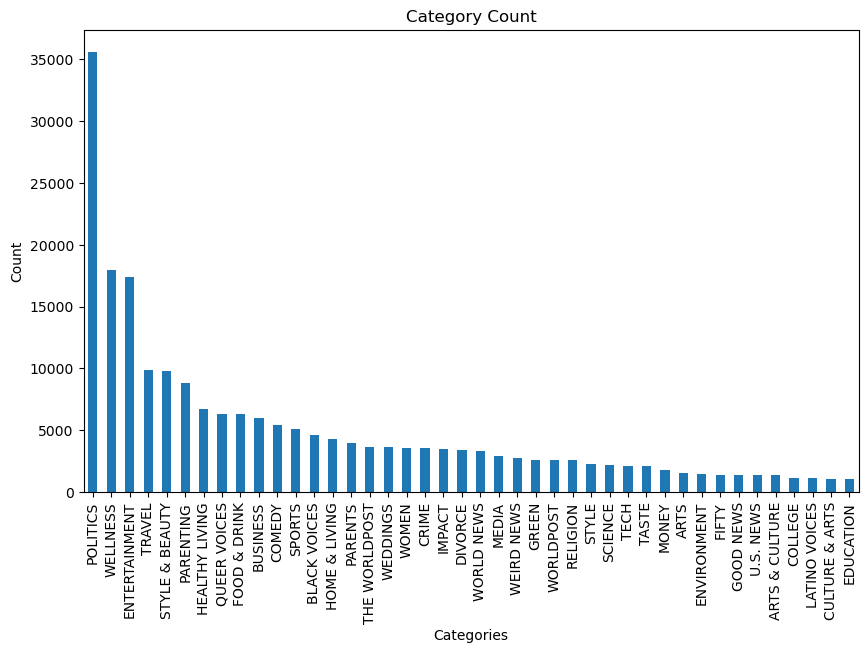

In [427]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Count')
plt.show()

# check for missing data :

In [428]:
missing_data = df_script_jf.isnull().sum()

if missing_data.any():
    print("missing")
    print(missing_data[missing_data > 0])
else:
    print("no missing data")
    
    

no missing data


In [429]:

empty_data = df_script_jf.applymap(lambda x:str(x).strip() == '')

if empty_data.any().any():
    print("Columns with empty data:")
    print(empty_data.sum())
else:
    print("No empty data found.")

Columns with empty data:
link                              0
headline                          6
category                          0
short_description             19720
authors                       37418
date                              0
headline_tokenize                 0
short_description_tokenize        0
headline_nostop                   0
short_description_nostop          0
headline_lemmatized               0
dtype: int64


#  max/min/median word length for headline and description

In [431]:
df_script_jf['mx_mn']=df_script_jf['short_description_nostop'] + df_script_jf['headline_nostop']

In [434]:
print('min : ', df_script_jf['mx_mn'].map(lambda x: len(x)).min())
print('max : ', df_script_jf['mx_mn'].map(lambda x: len(x)).max())
print('median : ' ,df_script_jf['mx_mn'].map(lambda x: len(x)).median())
type(df_script_jf['mx_mn'])

min :  1
max :  142
median :  18.0


pandas.core.series.Series

# the 3 most frequent words for categoty with headline no stop words and description nostop lines :

In [412]:
import numpy as np

In [416]:

df_script_jf['headline_nostop'] = df_script_jf['headline_nostop'].astype(str)
df_script_jf['short_description_nostop'] = df_script_jf['short_description_nostop'].astype(str)

df_script_jf['text'] = df_script_jf['headline_nostop'] + df_script_jf['short_description_nostop'].astype(str)


grouped_text = df_script_jf.groupby('category')['text'].apply(lambda x: ''.join(x))

top_3_words_by_category = {}
for category, text in grouped_text.items():
    all_words = text.split() 
    word_counts = Counter(all_words) 
    top_3_words = word_counts.most_common(3)  
    top_3_words_by_category[category] = top_3_words


for category, top_3_words in top_3_words_by_category.items():
    print(f"Category: {category}")
    for word, count in top_3_words:
        print(f"{word}: {count}")
    print()

Category: ARTS
'art',: 252
'new',: 154
'one',: 130

Category: ARTS & CULTURE
'art',: 129
'new',: 120
'book',: 106

Category: BLACK VOICES
'black',: 1297
'new',: 379
'police',: 329

Category: BUSINESS
'business',: 665
'new',: 548
'us',: 391

Category: COLLEGE
'college',: 337
'students',: 214
'university',: 130

Category: COMEDY
'trump',: 759
'donald',: 589
'show',: 386

Category: CRIME
'police',: 543
'man',: 342
'shooting',: 298

Category: CULTURE & ARTS
'art',: 235
'new',: 124
'artist',: 97

Category: DIVORCE
'divorce',: 1580
'marriage',: 358
'one',: 302

Category: EDUCATION
'school',: 272
'education',: 261
'students',: 184

Category: ENTERTAINMENT
'new',: 1754
'star',: 922
'first',: 753

Category: ENVIRONMENT
'climate',: 210
'photos',: 172
'week',: 161

Category: FIFTY
'one',: 162
'life',: 151
'years',: 149

Category: FOOD & DRINK
'food',: 814
'recipes',: 796
'make',: 544

Category: GOOD NEWS
'dog',: 90
'people',: 70
'help',: 67

Category: GREEN
'climate',: 519
'change',: 274
'us',: 1